In [1]:
import numpy as np
import matplotlib.pyplot as plt

Assume that a computer’s time of failure is between 0 and 10 years and can be described by a uniform distribution.
Determine the distribution function of the phenomenon.
   - Calculate $\mathbb P(X\leq 9)$, that is, the probability that the delivery is before $9$.
   - Calculate the probability $\mathbb P(8.5<X<9)$, that is, the probability is between $8:30$ and $9:00$. 
   - Calculate the probability $\mathbb P(X>9.75)$.
   - Draw the curve $\mathbb P(X\leq t)$ (the cumulative distribution function of $X$) as a function of  $t$, where $t\in \mathbb R$ is a real number. 
   - Does there exist a function $f: \mathbb R\rightarrow \mathbb R_+$, such that $\mathbb P(a<X<b)=\int_a^b f(x)\ dx$ is satisfied for all real numbers $a< b$? 
    \end{enumerate} 

Mean of the sample: 4.996121


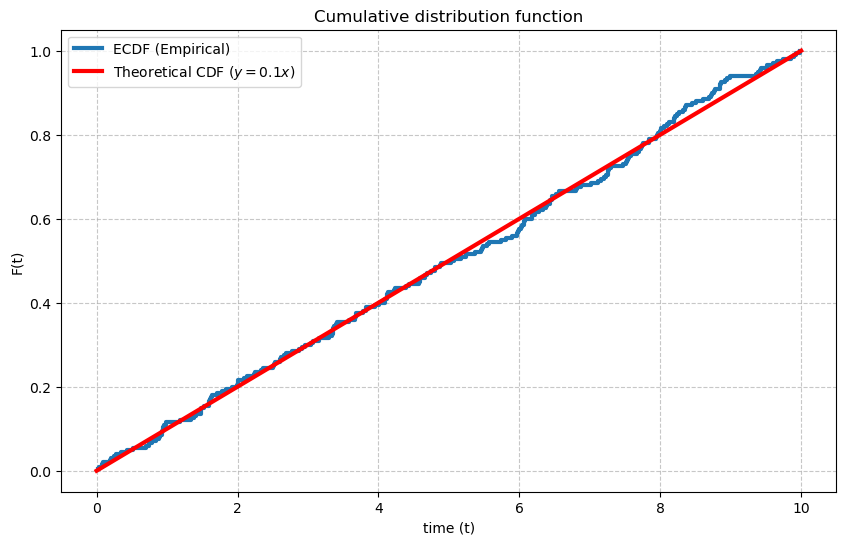

In [9]:
# 1. Generate the random sample (sample200 <- runif(200, 8, 10))
sample200 = np.random.uniform(low=0, high=10, size=200)

# 2. Calculate the mean (mean(sample200))
sample_mean = np.mean(sample200)
print(f"Mean of the sample: {sample_mean:.6f}")

# 3. Plot the ECDF (plot(ecdf(sample200), ...))

# To get ECDF points: sort the data (x-values) and calculate cumulative proportions (y-values)
x_ecdf = np.sort(sample200)
y_ecdf = np.arange(1, len(sample200) + 1) / len(sample200)

plt.figure(figsize=(10, 6))

# Plot the ECDF using plt.step to get the step-like function of ECDF
plt.step(x_ecdf, y_ecdf, where='post', linewidth=3, label="ECDF (Empirical)")

# 4. Add the theoretical CDF line 
x_line = np.linspace(0, 10, 100)
y_line = 0 + 0.1 * x_line
plt.plot(x_line, y_line, color="red", linewidth=3, label="Theoretical CDF ($y = 0.1x$)")

# Set plot properties
plt.title("Cumulative distribution function")
plt.xlabel("time (t)")
plt.ylabel("F(t)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Suppose that the response time of a server (in seconds) has exponential distribution with parameter $\lambda=2$. 
   - Determine the cumulative distribution function and the density function of the response time.
   - What is the probability that the response time is more than   $0.5$ seconds?
   - the response time is at least  $1$ second?
   -  given that the response time is at least $0.5$ second. what is probability that it is at least $2.5$ seconds?
   -  What is the probability that the response time is between $1$ and $2$ seconds? 
   -  For which  $t$ is it true that the probability that the response time is at most $t$ is equal to $1/2$?
   -  Find the expectation and standard deviation of $X$. 
   -  Generate a sample of $1000$ random variables from the exponential distribution with parameter $\lambda=2$. Make a histogram, and find the mean, standard deviation and median of the sample. Compare the results with the values calculated above. 

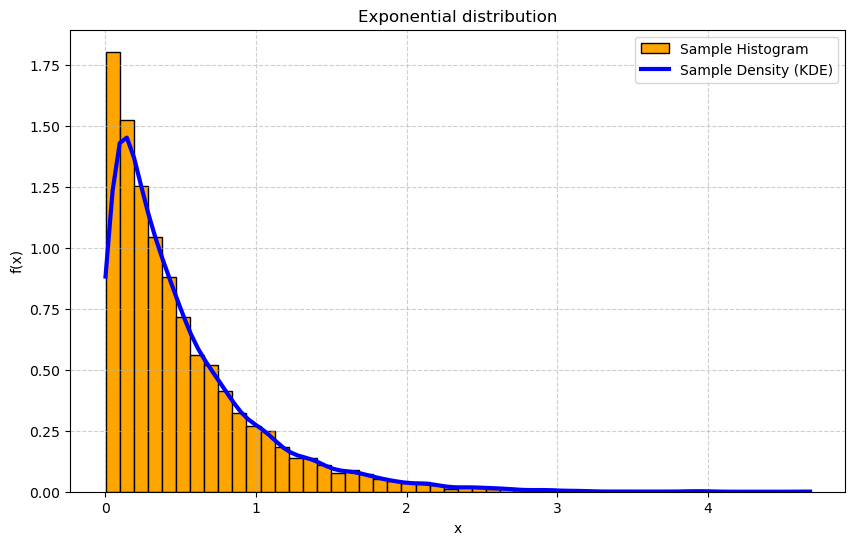

In [14]:
from scipy.stats import gaussian_kde

# 1. Generate the random sample (rexp(1000, rate=2) -> scale=1/2)
# R's 'rate' (lambda) is the reciprocal of NumPy's 'scale' (1/lambda).
expsample = np.random.exponential(scale=1/2, size=10000)

# --- Plot 1: Histogram and Sample Density Curve ---

# 2. Histogram (hist(..., freq=FALSE) -> density=True)
plt.figure(figsize=(10, 6))
plt.hist(expsample, bins=50, color="orange", density=True, edgecolor="black", label="Sample Histogram")

# 3. Sample Density Curve (lines(density(expsample), lwd="3"))
# Calculate KDE (Kernel Density Estimate) using scipy.stats.gaussian_kde
kde = gaussian_kde(expsample)
x_kde = np.linspace(expsample.min(), expsample.max(), 100)
y_kde = kde.evaluate(x_kde)
plt.plot(x_kde, y_kde, color="blue", linewidth=3, label="Sample Density (KDE)")

# Set plot properties
plt.title("Exponential distribution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
# 2. Calculate the mean (mean(expsample))
sample_mean = np.mean(expsample)
print(f"Mean of the sample: {sample_mean:.6f}")

Mean of the sample: 0.499980


In [16]:
sample_std = np.std(expsample)

print("Sample Standard Deviation:", sample_std)

Sample Standard Deviation: 0.498343742599636


Generate a random independent sample of size $1000$ from the normal distribution with mean $1$ and variance $4$. Make a histogram, calculate the mean and the standard deviation, and determine the proportion of the elements between $-1$ and $3$. 

The proportion of values between -1 and 3 is: 0.652


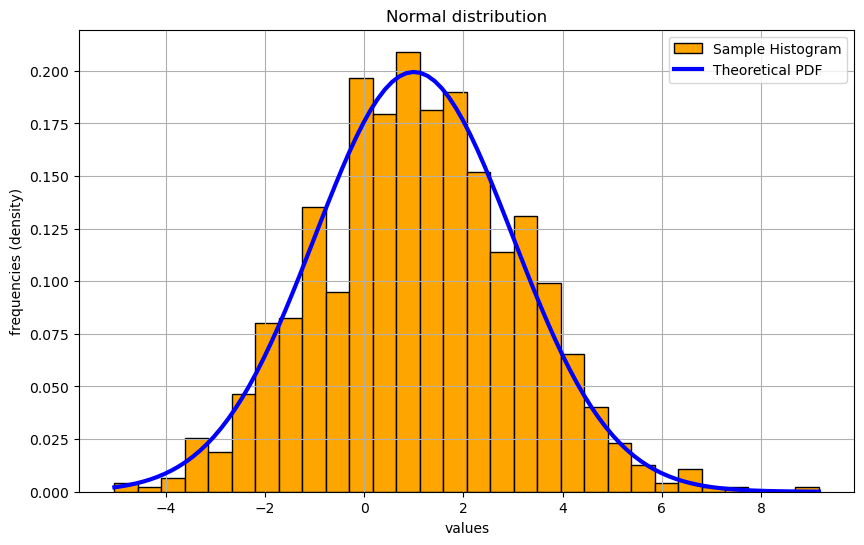

In [18]:
from scipy.stats import norm

# Generate a random sample from a normal distribution
temp = np.random.normal(loc=1, scale=2, size=1000)

# Create a histogram with density=True to match freq=F in R
plt.figure(figsize=(10, 6))
plt.hist(temp, bins=30, color="orange", density=True, edgecolor="black", label="Sample Histogram")

# Plot the theoretical normal distribution curve
x_values = np.linspace(temp.min(), temp.max(), 100)
y_values = norm.pdf(x_values, loc=1, scale=2)
plt.plot(x_values, y_values, color="blue", linewidth=3, label="Theoretical PDF")

# Set plot properties to match R code
plt.title("Normal distribution")
plt.xlabel("values")
plt.ylabel("frequencies (density)")
plt.legend()
plt.grid(True)

# Calculate the proportion of values between -1 and 3
proportion = np.sum((-1 < temp) & (temp < 3)) / len(temp)

print(f"The proportion of values between -1 and 3 is: {proportion}")